In [17]:
"""
Compute eigenvectors and eigenvalues using a preconditioned eigensolver
========================================================================

In this example Smoothed Aggregation (SA) is used to precondition
the LOBPCG eigensolver on a two-dimensional Poisson problem with
Dirichlet boundary conditions.
"""

import scipy
from scipy.sparse.linalg import lobpcg, eigsh

from pyamg import smoothed_aggregation_solver
from pyamg.gallery import poisson

N = 1000
K = 9
A = poisson((N,N), format='csr')
A = A + A.T

# create the AMG hierarchy
%time ml = smoothed_aggregation_solver(A)

# initial approximation to the K eigenvectors
%time X = scipy.rand(A.shape[0], K) 

# preconditioner based on ml
%time M = ml.aspreconditioner()

# compute eigenvalues and eigenvectors with LOBPCG
%time W,V = lobpcg(A, X, M=M, tol=1e-8, largest=False)

CPU times: user 15.5 s, sys: 644 ms, total: 16.2 s
Wall time: 4.74 s
CPU times: user 560 ms, sys: 24 ms, total: 584 ms
Wall time: 147 ms
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 473 µs
CPU times: user 2min 47s, sys: 7.07 s, total: 2min 55s
Wall time: 48.6 s


In [18]:
N = 1000
K = 9
A = poisson((N,N), format='csr')

A = A + A.T

%time foo,bar = eigsh(A, K, which="SM", tol=1e-2)

KeyboardInterrupt: 

In [12]:
W.shape

(9,)

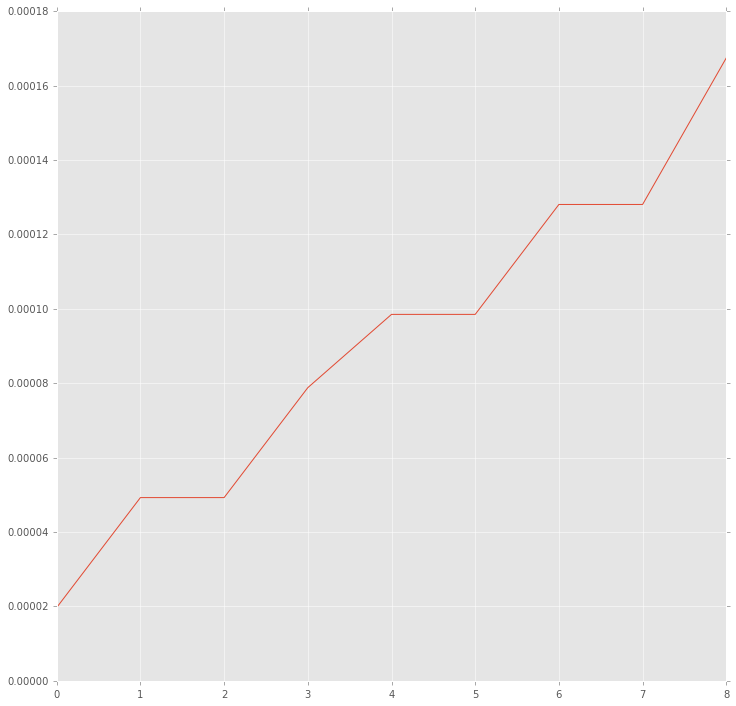

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (12.0, 12.0)

plt.plot(W)

In [ ]:
#plot the eigenvectors
import pylab

pylab.figure(figsize=(9,9))

for i in range(K):
    pylab.subplot(3, 3, i+1)
    pylab.title('Eigenvector %d' % i)
    pylab.pcolor(V[:,i].reshape(N,N))
    pylab.axis('equal')
    pylab.axis('off')
pylab.show()